<a href="https://colab.research.google.com/github/nickstone1911/data-analysis-practice/blob/main/Random_Forest_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tech Lesson 15 Code-Along Notebook: Random Forest Classification in Python
>- Overview: Random forests are ensemble learners that have been shown to be robust to noisy data and outliers, have improved predictive performance, allow for examination of feature importance, and are relatively easy to implement in many different use cases.  

In this lesson we will discuss the major components of conducting a classification task using the `RandomForestClassifier` from `scikit-learn` including the learning objectives listed below.

## Learning Objectives
1. Importing the required modules
2. Instantiating and fitting `RandomForestClassifier`
3. Evaluating the results of a `RandomForestClassifer`
4. Developing an understanding of key hyperparameters
5. Performing a grid search to find optimal hyperparameters
6. Applying graphical analysis to further refine hyperparameters
7. Deploying a random forest model to predict new case classification

---





# Data Understanding

We will be using one of the same datasets we examined from prior lessons on classification. In this lesson, we will revist the "Penguins" dataset.
## Data Description
Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network. The work of these researchers was published in the following article:

>- *Gorman KB, Williams TD, Fraser WR. (2014). Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081*

## Data Summary

For this exercise we will use: [penguins_size.csv](https://drive.google.com/file/d/1ff3C7uy52ZqVznrO_AvP2II6sHFJBuLt/view?usp=sharing)

* This is a simplified version of the original data and contains the following features:

    * `species`: penguin species (Chinstrap, Adélie, or Gentoo)
    * `culmen_length_mm`: culmen length (mm)
    * `culmen_depth_mm`: culmen depth (mm)
    * `flipper_length_mm`: flipper length (mm)
    * `body_mass_g`: body mass (g)
    * `island`: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * `sex`: penguin sex

Note: The culmen is "the upper ridge of a bird's beak"

## Problem
The goal in this exercise is to create a model that can help predict a species of a penguin based on physical attributes. The model can be used to help researchers classify penguins in the field, instead of needing an experienced biologist on site.

---

# Section 1: Setting Up the Environment

## 1.1: Imports

In the next cell import the following modules:

>- `os`, `numpy`, `pandas`, `matplotlib.pyplot`, `seaborn`
>- Use the common aliases for each of these


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2: Set Your Working Directory

In the next cell(s), set your working directory to your desired workspace for this lesson.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
os.chdir('/content/drive/MyDrive/BAIM4205')
os.getcwd()

Mounted at /content/drive/


'/content/drive/MyDrive/BAIM4205'

## 1.3: Load Data

Download/move the file to your working directory.

>- [penguins_size.csv](https://drive.google.com/file/d/1ff3C7uy52ZqVznrO_AvP2II6sHFJBuLt/view?usp=sharing)

  ---


Load the file into a pandas DataFrame named, `pen_df`:


In [ ]:
pen_df = pd.read_csv('penguins_size.csv')

## 1.4: Sample Data

In the next cell, show the first 5 records in `pen_df` in the next cell.

In [ ]:
pen_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## 1.5: Data Shape

In the next cell, show the number columns and rows in the `pen_df`

In [ ]:
pen_df.shape

(344, 7)

---

# Data Exploration Notes
>- We will not go through a full data exploration in this exercise
>- We will focus on learning `RandomForestClassifier` but don't forget a full project would include a section on data exploration and exploratory data analysis, data preparation, etc.

---

# Section 2: Data Preparation

Tree based models are more robust to outliers than linear models and they do not need variables to be normalized to work. As such, we usually don't need to process our data as much when working with random forests because they use an ensemble of trees to generate the model.

It can still be helpful to dummy code our categorical variables so we will do that in this section.

## 2.1: Drop Missing Values

In the next cell, drop any rows with missing values.

>- Show the number of rows and columns after dropping the missing values.

In [ ]:
pen_df = pen_df.dropna()

pen_df.shape

(334, 7)

## 2.2: Clean Up `sex` Column

In the dataset, some penguins do not have a label for sex but have a `.` when 'MALE' or 'FEMALE' was not recorded. For this exercise we will drop these penguins from the analysis.

In the next cell, drop all the records of penguins that do not have a designation of 'MALE' or 'FEMALE'. Show how many total rows and columns are in the new `pen_df` after dropping the rows.

In [ ]:
pen_df = pen_df.loc[pen_df['sex']!='.']

pen_df.shape

(333, 7)

## 2.3: Create Dummy Variables

In the next cell, define the `X` dataframe containing the features we will use to predict `species`.

>- Create dummy variables for the categorical features
>- Pass the argument, `drop_first=True` to create true dummy variables so we don't include all one-hot encoded columns of the categories

In [ ]:
X = pd.get_dummies(pen_df.drop('species',axis=1), drop_first=True)

X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True,True
1,39.5,17.4,186.0,3800.0,False,True,False
2,40.3,18.0,195.0,3250.0,False,True,False
4,36.7,19.3,193.0,3450.0,False,True,False
5,39.3,20.6,190.0,3650.0,False,True,True


## 2.4: Create Target Feature Variable

In the next cell, define the target for this exercises as `y`.

>- Show the number of cases in each of the target classes in your results

In [ ]:
y = pen_df['species']

y.value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

## 2.4: Train|Test Split

In the next cell(s), create training and testing datasets from the `X` and `y` datasets.

## Train|Test Split

>- Use a test size of 30%
>- Set a random state of 101

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Section 3: Random Forest Classification

In this section, we learn how to import and fit a `RandomForestClassifier`.

## 3.1: Import `RandomForestClassifier`

We can import the random forest classifier with the following code:

```
from sklearn.ensemble import RandomForestClassifier
```

In [ ]:
from sklearn.ensemble import RandomForestClassifier

## 3.2. Instantiate the Model

In the next cell, instantiate an instance of a `RandomForestClassifier` named, `rf_model`, with the following parameters:

1. `n_estimators = 10`
>- This is the number of trees to use in the random forest
>- Later we will explore what changing this can do
2. `max_features = 'sqrt'`
>- This is the maximum number of features to consider when looking for the best split at each node. This helps control overfitting.
3. `random_state = 101`

See [Random Forest Hyperparameter](https://docs.google.com/presentation/d/1ClxxyvaPzeiiYWxye8Z5Y0dRjamo8mcKG-E9fYj2roo/edit?usp=sharing) slides for more info on random forest hyperparameters.

In [ ]:
rf_model = RandomForestClassifier(n_estimators=10, max_features='sqrt', random_state=101)

## 3.3: Fit `rf_model` to the Training Datasets

In the next cell, fit the `rf_model` to the training datasets.

In [ ]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

## 3.4: Predict

In the next cell, use `rf_model` to create predictions from `X_test`. Save the predictions in a variable, `rf_preds`.

In [ ]:
rf_preds = rf_model.predict(X_test)

# Section 4: Evaluation

In this section we evaluate our random forest classifier.

## 4.1: Creat Confusion Matrix Display

In the next cell(s), import the necessary modules to create a `ConfusionMatrixDisplay` and then display the confusion matrix display for the `rf_model`.

Note: we have done this several times in other exercises so refer back to those notes or see [ConfusionMatrixDisplay doc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) if you need a refresher.

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,accuracy_score

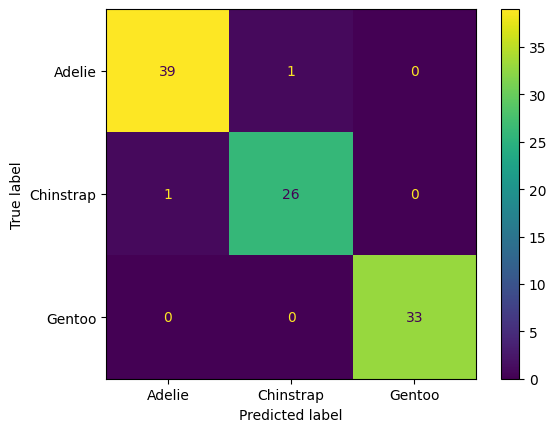

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf_model,X_test,y_test)

In [ ]:
pd.DataFrame(confusion_matrix(y_test,rf_preds), columns = ['Adelie_pred', 'Chinstrap_pred','Gentoo_pred'],
             index = ['Adelie', 'Chinstrap','Gentoo'] )

,Adelie_pred,Chinstrap_pred,Gentoo_pred
Adelie,39,1,0
Chinstrap,1,26,0
Gentoo,0,0,33


## 4.2: Classification Report

Display the classification report in the next cell.

In [ ]:
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        40
   Chinstrap       0.96      0.96      0.96        27
      Gentoo       1.00      1.00      1.00        33

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



## 4.3: Feature Importance

In the next cell, show the feature importances in descending order.

>- Recall the `feature_importances_` feature of the decision tree and random forest models.
>- Round the importance metric to 2 decimals
>- Enter data in `0.XX` format

In [ ]:
round(pd.DataFrame(rf_model.feature_importances_, columns = ['Importance'],
             index = X.columns).sort_values(by = 'Importance',ascending = False), 2)

,Importance
culmen_length_mm,0.38
flipper_length_mm,0.23
body_mass_g,0.15
island_Dream,0.12
culmen_depth_mm,0.10
island_Torgersen,0.01
sex_MALE,0.00


# Section 5: Random Forest - HyperParameter Exploration

In this section, we learn how to find the optimal parameter values for some of the most important hyperparameters of random forests:

1. `n_estimators`
2. `max_features`
3. `bootstrap`
4. `oob_score`

See the lesson slide notes, [Tech Lesson 15 Slides - Random Forest Hyperparameters](https://docs.google.com/presentation/d/1ClxxyvaPzeiiYWxye8Z5Y0dRjamo8mcKG-E9fYj2roo/edit?usp=sharing), for more details about each of these hyperparameters.

---

## 5.1: Choosing correct number of trees (`n_estimators`)

In this section we will explore how changing the number of trees used in the random forest model changes accuracy.

In the next cell(s):

1. Initialize an empty list `test_error` to store the test error for each number of trees.
2. For each number of trees n from 1 to 39:
>- Create a Random Forest Classifier with n trees (`n_estimators=n`) and `max_features='sqrt'`.
>>- Set a random state of 42 so we have reproducible results
>- Fit the model on the training data (X_train, y_train).
>- Make predictions on the test data (X_test).
>- Calculate the test error as `1 - accuracy_score(test_preds, y_test)` and append it to `test_error`.
3. Analyze the `test_error` list to understand how the number of trees affects the model's performance.

Create the code to store `test_error` in the next cell.

In [ ]:
test_error = []

for n in range(1, 40):

  #instantiate
  rfc = RandomForestClassifier(n_estimators = n, max_features='sqrt', random_state = 42)
  #fit
  rfc.fit(X_train, y_train)
  #predict
  preds = rfc.predict(X_test)
  # calculate error and append to test_error list
  error = 1 - accuracy_score(preds, y_test)
  test_error.append(error)

Analyze the test errors in the next cell.

>- How many trees should we consider based on this?
>- To help answer this question replicate the following chart:
>>- [lesson15_5.1_trees_png](https://drive.google.com/file/d/18KsM5KYkvHdVX2gwT8LctX373uj26vf2/view?usp=sharing)

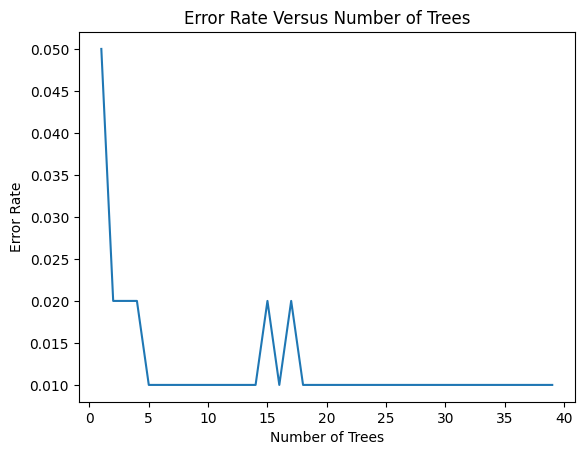

In [ ]:
fig, ax = plt.subplots()

# define data
x_plot = [n for n in range(1, 40)]
y_plot = test_error

#plot
ax.plot(x_plot, y_plot)

#customize
ax.set_title("Error Rate Versus Number of Trees")
ax.set_xlabel("Number of Trees")
ax.set_ylabel("Error Rate")

plt.savefig('lesson15_5.1_trees.png')
plt.show()

## 5.2: How many trees?

Based on the chart produced in section 5.1, how many trees should we use to create a random forest model for this dataset?

Use the markdown cell (and possibly Canvas) to provide your response.

### Solution Notes
>- Based on plotting the error rates versus trees it looks like using 5 trees will be best for this dataset.
>- The error rate appears to bottom out here and we actually see some increases in error at larger number of trees which indicates the model is overfitting and fitting to too much noise in the data if we increase the number of trees too much.

---

## 5.3: Grid Search

Having explored how to get the number of trees by storing and analyzing error rates for various number of trees, let's now explore using `GridSearchCV` to find optimal values for the key parameters discussed at the beginning of this section.

In the next cell, perform a grid search using the following values for each parameter:

>- `n_estimators=[2, 3, 4, 5, 64, 100]`
>- `max_features = [2, 3, 4, 5]`
>>- Note: recommendations include using `sqrt(n_features)` and `n_features / 3` as starting points
>>- We will get fractions for this so pick numbers that are below and above these values (e.g., sqrt(7) = 2.64 so pick 2 and 3 to pass into `max_features`
>>- We are adding a few more values to test as well
>- `bootstrap = [True,False]`
>- `oob_score = [True,False]`

### 5.3.1: Parameter Values

Define the parameter values in the next cell.

In [ ]:
n_estimators=[2, 3, 4, 5, 64,100]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

### 5.3.2: Define the Parameter Grid

In the next cell define `param_grid`.
>- Recall: a parameter grid is a dictionary that maps the parameter names to the values we want to test (e.g, 'n_estimators':n_estimators)

In [ ]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}  # Note, oob_score only makes sense when bootstrap=True!

### 5.3.3: Import `GridSearchCV`

In the. next cell, import the `GridSearchCV` package.

In [ ]:
from sklearn.model_selection import GridSearchCV

### 5.3.4: Grid Search

In the next cell, perform a grid search.

>- When instantiating the model, set a random state of 42
>- Recall: [GridSearchCV doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) if you need a refresher on grid search in scikit-learn.

In [ ]:
rfc = RandomForestClassifier(random_state = 42)

grid = GridSearchCV(rfc, param_grid)

### 5.3.5: Fit Grid Model

In the next cell, fit the grid model to the training data.

Note: we will get a lot of warnings because it doesn't make sense to calculate `oob_score` if `bootstrap = False` because there will be no out of bag score if there is no bootstrapping. To suppress warnings in a notebook you can use the following:

```
import warnings
warnings.filterwarnings('ignore')
```

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [2, 3, 4, 5, 64, 100],
                         'oob_score': [True, False]})

### 5.3.6: Cross Validation Results

In the next cell, show the cross validation results from the grid search.

>- Show the results as a DataFrame sorted by the highest ranking model

In [ ]:
pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_features,param_n_estimators,param_oob_score,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.248921,0.091420,0.015421,0.005560,True,2,64,False,"{'bootstrap': True, 'max_features': 2, 'n_esti...",1.000000,1.0,1.0,1.0,1.0,1.000000,0.000000,1
8,0.348396,0.040336,0.021059,0.012129,True,2,64,True,"{'bootstrap': True, 'max_features': 2, 'n_esti...",1.000000,1.0,1.0,1.0,1.0,1.000000,0.000000,1
21,0.103820,0.008270,0.006325,0.000345,True,3,64,False,"{'bootstrap': True, 'max_features': 3, 'n_esti...",0.978723,1.0,1.0,1.0,1.0,0.995745,0.008511,3
22,0.182848,0.004495,0.008176,0.000661,True,3,100,True,"{'bootstrap': True, 'max_features': 3, 'n_esti...",0.978723,1.0,1.0,1.0,1.0,0.995745,0.008511,3
23,0.143207,0.004017,0.007924,0.000739,True,3,100,False,"{'bootstrap': True, 'max_features': 3, 'n_esti...",0.978723,1.0,1.0,1.0,1.0,0.995745,0.008511,3


### 5.6.7: Best Values for Hyperparameters

In the next cell, show the best parameters based on the grid search.

In [ ]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64, 'oob_score': True}

### 5.6.8: Grid Confusion Matrix

In the next cell, show the `grid` model confusion matrix.

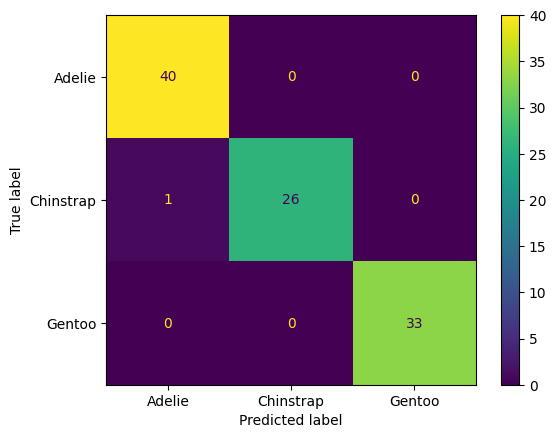

In [ ]:
ConfusionMatrixDisplay.from_estimator(grid,X_test,y_test)

### 5.6.9: Grid Classification Report

In the next cell, show the grid model classification report.

In [ ]:
grid_preds = grid.predict(X_test)

print(classification_report(y_test, grid_preds))

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        40
   Chinstrap       1.00      0.96      0.98        27
      Gentoo       1.00      1.00      1.00        33

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



## 5.4: How many trees are really necessary?

If you performed your grid search with the same parameters as indicated in the problems, you should have recieved back the best parameters of the following:

>- n_estimators = 64
>- max_features = 2
>- bootstrap = True
>- oob_score = True

However, recall in section 5.1 and 5.2 we found that it looks like 5 trees might be enough based on plotting out the error.

Let's reexamine a plot of the error rates but this time set all of the parameters to the grid search recommendations except for the number of estimators.

In the next cell, repeat the for loop based on the directions in section 5.1 but this time:

1. Include values that range from 1 to 64 as your number of estimators
2. Set max_features = 2 which was what the grid search showed to be optimal
3. Set bootstrap and oob_score both equal to True
>- Note: setting `oob_score` to True only works if bootstrap is True because you can't have an `oob_score` if you don't have bootstrapping
4. Set a random state of 42

In [ ]:
test_error = []

for n in range(1, 65):

  #instantiate
  rfc = RandomForestClassifier(n_estimators = n, max_features=2, bootstrap=True, oob_score=True, random_state = 42)
  #fit
  rfc.fit(X_train, y_train)
  #predict
  preds = rfc.predict(X_test)
  # calculate error and append to test_error list
  error = 1 - accuracy_score(preds, y_test)
  test_error.append(error)

Now repeat plotting out the errors versus the number of trees as we did in section 5.1.

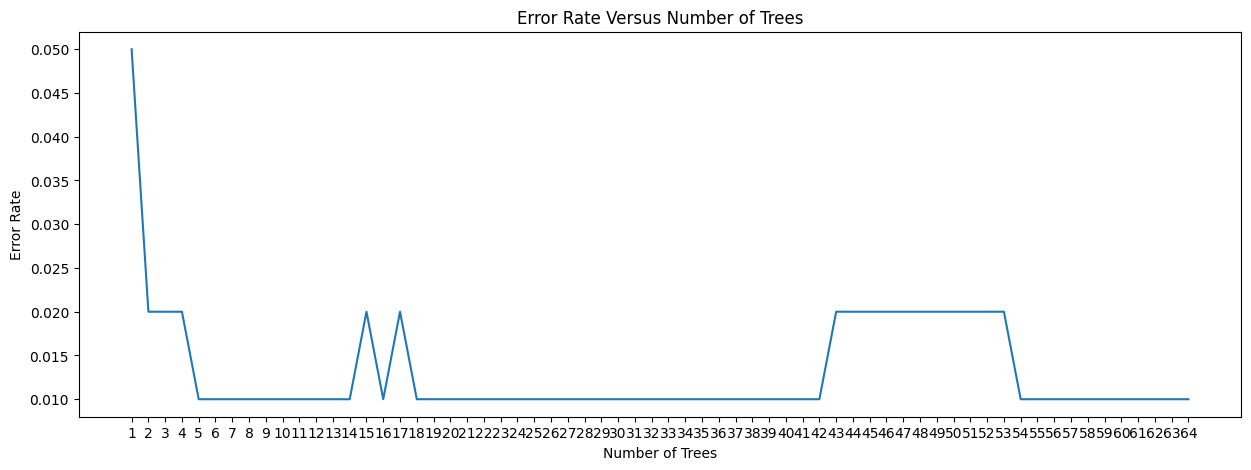

In [ ]:
fig, ax = plt.subplots(figsize = (15, 5))

# define data
x_plot = [n for n in range(1, 65)]
y_plot = test_error

#plot
ax.plot(x_plot, y_plot)

#customize
ax.set_title("Error Rate Versus Number of Trees")
ax.set_xlabel("Number of Trees")
ax.set_ylabel("Error Rate")
ax.set_xticks(x_plot)

plt.savefig('lesson15_5.5_trees.png')
plt.show()

### How many trees?

#### Solution Notes
After looking at the error plot based on our grid model, it still looks like using 5 estimators will be ok for this model. We know this because after n = 5 trees we clearly see the error rate bottom out and spike up a few times at various number of trees then it flattens out again after about 54/55 trees.

>- There is no clear advantage of using 64 trees versus using 5 trees in our model so we will use 5 trees.
>- Remember, all else being equal, we want to use a less complex model and using 5 trees versus 64 is a far less complex model

---

# Section 6: Final Model

After performing a grid search and being satisfied with the model performance, we can now build our final model.

## 6.1: Instantiate Final Model

In the next cell, define a final random forest classifier based on the results of the grid search and error rate evaluation we conducted in section 5.

In [ ]:
rfc_final = RandomForestClassifier(n_estimators = 5, max_features=2, bootstrap = True)

## 6.2: Fit final model

In the next cell, fit the final model using all our available data.

In [ ]:
rfc_final.fit(X, y)

RandomForestClassifier(max_features=2, n_estimators=5)

## 6.3: Deploy Model

In the next cell, practice deploying your model by assuming a new penguin has just been evaluated by field workers with the following values and the researchers want to know the most likely species based on this data:

>- culmen_length_mm = 42
>- culmen_depth_mm = 16
>- flipper_lenth_mm = 205
>- body_mass_g = 4002
>- The penguin is female
>- The penguin is from the island of Biscoe


In [ ]:
# set up your new penguin data
# using a list of dictionaries allows for more cases if needed, just create another dictionary
new_case = [{'culmen_length_mm':42,
                         'culmen_depth_mm': 16,
                         'flipper_length_mm': 205,
                         'body_mass_g' : 4002,
                         'island_Dream': False,
                         'island_Torgersen': False,
                         'sex_MALE' : False},

            ]

# convert to DataFrame to use in predict()
new_case = pd.DataFrame(new_case)

In [ ]:
# Now predict the new case species

rfc_final.predict(new_case)

array(['Gentoo'], dtype=object)